In [1]:
cd ~/Desktop/LinearProgramming
git commit
git push origin master

SyntaxError: invalid syntax (<ipython-input-1-d5e901188df2>, line 1)

# Linear Programming (OPER 610) Project
## MAJ Matthew Ferguson

### Setup and test configuration
The first requirement is to import necessary methods from PuLP.
I've previously installed GNU LPK and the CBC Solver comes with PuLP. Gurobi is pending... hopefully that will be number three.  

the first block of code tests for connectivity of the Solvers.  Ideally, the output should appear something like:

Testing zero subtraction
	 Testing inconsistant lp solution
	 Testing continuous LP solution
	 Testing maximize continuous LP solution
	 Testing unbounded continuous LP solution
	 Testing Long Names
	 Testing repeated Names
	 Testing zero constraint
	 Testing zero objective
	 Testing LpVariable (not LpAffineExpression) objective
	 Testing Long lines in LP
	 Testing LpAffineExpression divide
	 Testing MIP solution
	 Testing MIP solution with floats in objective
	 Testing MIP relaxation
	 Testing feasibility problem (no objective)
	 Testing an infeasible problem
	 Testing an integer infeasible problem
	 Testing column based modelling
	 Testing dual variables and slacks reporting
	 Testing fractional constraints
	 Testing elastic constraints (no change)
	 Testing elastic constraints (freebound)
	 Testing elastic constraints (penalty unchanged)
	 Testing elastic constraints (penalty unbounded)
* Solver pulp.solvers.PULP_CBC_CMD passed.
Solver pulp.solvers.CPLEX_DLL unavailable
Solver pulp.solvers.CPLEX_CMD unavailable
Solver pulp.solvers.CPLEX_PY unavailable
Solver pulp.solvers.COIN_CMD unavailable
Solver pulp.solvers.COINMP_DLL unavailable
	 Testing zero subtraction
	 Testing inconsistant lp solution
	 Testing continuous LP solution
	 Testing maximize continuous LP solution
	 Testing unbounded continuous LP solution
	 Testing Long Names
	 Testing repeated Names
	 Testing zero constraint
	 Testing zero objective
	 Testing LpVariable (not LpAffineExpression) objective
	 Testing LpAffineExpression divide
	 Testing MIP solution
	 Testing MIP solution with floats in objective
	 Testing MIP relaxation
	 Testing feasibility problem (no objective)
	 Testing an infeasible problem
	 Testing an integer infeasible problem
	 Testing column based modelling
	 Testing fractional constraints
	 Testing elastic constraints (no change)
	 Testing elastic constraints (freebound)
	 Testing elastic constraints (penalty unchanged)
	 Testing elastic constraints (penalty unbounded)
* Solver pulp.solvers.GLPK_CMD passed.
Solver pulp.solvers.XPRESS unavailable
Solver pulp.solvers.GUROBI unavailable
Solver pulp.solvers.GUROBI_CMD unavailable
Solver pulp.solvers.PYGLPK unavailable
Solver pulp.solvers.YAPOSIB unavailable

In [2]:
from pulp import *

#CBC_cmd throws a pointer error..
#pulp.pulpTestAll()

# Toy Model Instance

In [1]:
%matplotlib inline
import matplotlib.pyplot as pp
import numpy as np
from pulp import *
import timeit

# Decision variables
x = [0, LpVariable("x1", 0, 100), LpVariable("x2", 0, 100)]
# 0<= x1 <= 100 & 0<= x2 <= 100
 
# Setup Problem -- are LpMax and LpMin statics for 0,1 or -1,1?
p = LpProblem("problem", LpMaximize)
 
# Set up matrix A and vector b
p += 2*x[1]+x[2] <= 150
p += x[1]+x[2] <= 100
p += x[1]<=50
#strictly necessary?
p += x[1]>=0
p += x[2]>=0
 
# ObjFunc
p += 3*x[1]+2*x[2]

Solvr = 0    
time = []


GNULPK = Solvr

# Pass to GNU Solver
start = timeit.default_timer()
status = p.solve(GLPK(msg=0))
time.append(timeit.default_timer() - start)
print(LpStatus[status])


Solvr +=1
CBC = Solvr
#CBC
start = timeit.default_timer()
status = p.solve()
time.append(timeit.default_timer() - start)
print(LpStatus[status])

Solvr += 1
GUR = Solvr

#CPLEX
start = timeit.default_timer()
status = p.solve(CPLEX(msg=0))
time.append(timeit.default_timer() - start)
print(LpStatus[status])



#GUROBI
# Pull license with grbgetkey from an academic ip address
# call for second test license

print("(x1,x2) is optimal at (" + str(value(x[1])) + ", "+ str(value(x[2])) + ")" )
print(str(time[0]) + " seconds of CPU time (GLPK).")
print(str(time[1]) + " seconds of CPU time (COIN/CBC).")
print(str(time[2]) + " seconds of CPU time (CPLEX).")


Optimal
Optimal
Optimal
(x1,x2) is optimal at (50.0, 50.0)
0.101843118668 seconds of CPU time (GLPK).
0.0103008747101 seconds of CPU time (COIN/CBC).
0.371429920197 seconds of CPU time (CPLEX).


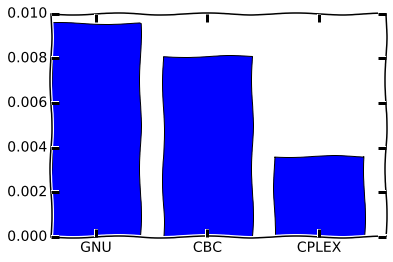

In [15]:



#import bokeh
pp.xkcd()
ind = np.arange(3)
chart_1 = pp.bar(ind, time)
pp.xticks(ind+.8/2,  ("GNU", "CBC", "CPLEX"))
pp.show()

#print(time)



### Now trying the pyomo package

In [1]:
import pyomo

s = open('pyomoTest.py', 'a+')

s.write('from pyomo.environ import * \n')
#just in-case we use integer values
s.write('from __future__ import division \n\n')

from pyomo.environ import *
from __future__ import division

s.write('p = AbstractModel()\n\n')
p = AbstractModel()

s.write('p.m = Param(within=NonNegativeIntegers)\n')
s.write('p.n = Param(within=NonNegativeIntegers)\n\n')
p.m = Param(within=NonNegativeIntegers)
p.n = Param(within=NonNegativeIntegers)

s.write('p.I = Set()\n')
s.write('p.J = Set()\n\n')
p.I = Set()
p.J = Set()

s.write('p.a = Param(p.I, p.J)\np.b = Param(p.I)\np.c = Param(p.J)\n\n')
p.a = Param(p.I, p.J)
p.b = Param(p.I)
p.c = Param(p.J)

s.write('p.x = Var(p.J, domain=NonNegativeReals)\n')
p.x = Var(p.J, domain=NonNegativeReals)

s.write('def obj_function(p):\n\treturn summation(p.c, p.a)\n\n')

def obj_function(p):
    return summation(p.c, p.a) #objfunc = sum of c_i * x_i over i

s.write('p.OBJ = Objective(rule=obj_function, sense=maximize)\n')
p.OBJ = Objective(rule=obj_function, sense=maximize)

s.write('def const_expression(p, i):\n\treturn sum(p.a[i,j] * p.x[j] for i in p.J) <= p.b[i]\n\n')
def const_expression(p, i):
    return sum(p.a[i,j] * p.x[j] for j in p.J) <= p.b[i]

s.write('p.AxbConstraint = Constraint(p.I, rule=const_expression)\n')
p.AxbConstraint = Constraint(p.I, rule=const_expression)

s.close()


In [ ]:

s = open('pyomoTest.dat', 'a+')

s.write('set I := 1 2 3 ;\nset J := 1 2 ;\n\n')
s.write('param a :=\n1 1 2\n1 2 1\n2 1 1\n 2 2 1\n3 1 1\n3 2 0\n;\n\n')
     
s.write('param c :=\n1 3\n2 2\n;\n\n')
s.write('param b :=\n1 150\n2 100\n3 50\n;\n\n')

s.close()

In [ ]:
from pyomo.environ import * 
from __future__ import division 

p = AbstractModel()

p.m = Param(within=NonNegativeIntegers)
p.n = Param(within=NonNegativeIntegers)

p.I = Set()
p.J = Set()

p.a = Param(p.I, p.J)
p.b = Param(p.I)
p.c = Param(p.J)

p.x = Var(p.J, domain=NonNegativeReals)
def obj_function(p):
	return summation(p.c, p.a)

p.OBJ = Objective(rule=obj_function, sense=maximize)
def const_expression(p, i):
	return sum(p.a[i,j] * p.x[j] for i in p.J) <= p.b[i]

p.AxbConstraint = Constraint(p.I, rule=const_expression)



##---------------------------------------------------
##---------------------------------------------------

from pyomo.opt import SolverFactory
opt = SolverFactory('glpk')

problem = p.create_instance()
result = opt.solve(problem)

print(result)


In [ ]:
pyomo solve pyomoTest.py pyomoTest.dat

## Pyomo kind of sucks... can't script easily

Build out of Concrete Model sucks for scripting
Abstract model with AMPL input can work, but
    AbstractModel() is touchy...  getting error raised by parser with pyomo_create_model
    
    


So.  Starting a looped process to place data in a multidimensional list (array).

We should loop through...

Solvers (GLPK, CBC, Solver) and record problem duration.



In [ ]:
import numpy, timeit
from pulp import *

Alice = numpy.random.randint(0, 100, (30, 30, 30))
Eigen = numpy.random.randint(1,100,30)

print(Eigen)
print(Eigen[1])

#insert bunch of orthogonalization here..
Alice = numpy.transpose(Alice) * numpy.diag(Eigen) * Alice
#Since All of Alice's eigenvalues are positive,
#Alice is now a positive definite matrix, and so
# since 0 is not an Eigenvalue, Alice is invertible.

Bob = numpy.random.randint(1, 20, (30, 30, 1))
Chuck = numpy.random.randint(-10,20, (30,1,30))

SOLVERS = {"CBC", "GLPK", "CPLEX"}

def solve_CBC(p):
    "Solves model using CBC Solver"
    start = timeit.default_timer()
    status = p.solve()
    return (status, timeit.default_timer() - start)

def solve_GLPK(p):
    "Solves with GNU LPK"
    start = timeit.default_timer()
    status = p.solve(GLPK(msg=0))
    return (timeit.default_timer() - start)
    
def solve_CPLEX(p):
    "Solves with CPLEX"
    start = timeit.default_timer()
    status = p.solve(CPLEX(msg=0))
    return (timeit.default_timer() - start)

I = range(0,29)

for i in I:
    qnum = "Problem" + str(i)
    q = LpProblem(qnum, LpMinimize)
    y = LpVariable.dicts('y_%s', I, lowBound = 0 )
    cost = dict(zip(I, Chuck))
    q += sum(cost[j] * y[j] for j in I)
    
    
    for n in range(0,29):
            q += sum([Alice[i][n][j] * y[j] for i in I]) >= Bob[n]
    
    (status, GLPKtime[i]) = solve_GLPK(q)
    print(LpStatus[Status])
    CBC_time[i] = solve_CBC(q)
    CPLEX_time[i] = solve_CPLEX(q)
